Code to test the effectiveness of term similarity through Cosine Similarity metrics

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import cleaner

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df_prods = pd.read_csv('../data/product_descriptions.csv')

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords


vect = CountVectorizer(min_df=1, stop_words=stopwords.words('english'))
X_vect = vect.fit_transform(df_prods['product_description'])


In [4]:
tfidf = TfidfVectorizer(min_df=1, stop_words=stopwords.words('english'))
X_tfidf = tfidf.fit_transform(df_prods['product_description'])

In [5]:
# How to convert a sentance to a vector
# gives back a 1 x p vector and counts the occurences
print vect.transform(['common angles'])

  (0, 21617)	1
  (0, 57044)	1


In [6]:
print tfidf.shape

(124428, 268737)


# Comapre with the search term

In [7]:
df_train = pd.read_csv('../data/train_sample.csv')

In [8]:
vect.transform(df_train.head(n=1)['search_term'])

<1x268737 sparse matrix of type '<type 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

In [10]:

row_num = 2
row = df_train.loc[row_num]
print row.relevance
print row['search_term']
print row['product_description']

3.0
chair molding
Complete your bathroom with this matching accessory set. This set includes a single towel rod and a double robe hook. Constructed with lead-free brass, this set is finished with beautiful premium chrome plating.2 hooks to maximize storage spaceSingle towel rod can hold up to 6 lbs. constructed with lead-free brass, ensuring strength and durabilityQuality control approved in Canada and re-inspected prior to shipping your order; premium chrome plating to suit any home decorMounting hardware included; solid bulky brass feelConcealed screw installation for a clean lookDesigned for easy installation


In [29]:
def get_cosine_similarity(row, df_corpus, vectorizer, X):
    row_num = df_corpus[df_corpus['product_uid'] == row['product_uid']].index
    return cosine_similarity(X[row_num],vectorizer.transform([row['search_term']])).tolist()[0][0]
df_train['cosine_count'] = df_train.apply(get_cosine_similarity, axis=1, args = (df_prods, vect, X_vect))
df_train['cosine_tfidf'] = df_train.apply(get_cosine_similarity, axis=1, args = (df_prods, tfidf, X_tfidf))

In [42]:
df_train[['cosine_count', 'cosine_tfidf']]

,cosine_count,cosine_tfidf
0,0.144338,0.129630
1,0.241955,0.249450
2,0.362473,0.353767
3,0.188562,0.140551
4,0.000000,0.000000
5,0.359211,0.135160
6,0.116642,0.185533
7,0.066667,0.109129
8,0.217250,0.169899
9,0.286910,0.236714


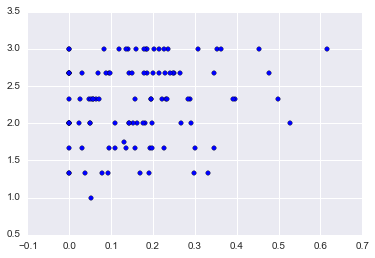

In [55]:
plt.scatter(df_train['cosine_tfidf'], df_train['relevance'] )

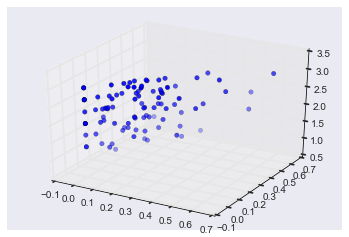

In [39]:
ax = plt.subplot(111, projection='3d')
ax.scatter(df_train['cosine_tfidf'], df_train['cosine_count'],
               zs=df_train['relevance'], s=20, c='b', depthshade=True)

In [11]:

row_num = df_prods[df_prods['product_uid'] == row['product_uid']].index



array([[ 0.36247326]])

In [12]:

row_num = df_prods[df_prods['product_uid'] == row['product_uid']].index
cosine_similarity(X_tfidf[row_num],tfidf.transform([row['search_term']]))

array([[ 0.35376704]])

In [14]:
vect_singular = CountVectorizer(min_df=1, stop_words=stopwords.words('english'))
X_sing = vect_singular.fit_transform(row[['product_description', 'search_term']])
cosine_similarity(X_sing[0],X_sing[1])

array([[ 0.]])